In [8]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Creación de conjuntos de entrenamiento y prueba

In [15]:
# Windows

def creacion_dataset(folder):
    
    imagenes = []
    etiquetas = []
    etiquetas_clases = os.listdir(folder)
    
    for etiqueta in etiquetas_clases:
        
        class_path = os.path.join(folder, etiqueta)
        if not os.path.isdir(class_path):
            continue
        
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (64, 64)) # Redimensionamos la imagen
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convertimos a escala de grises
                img = img.astype("float32") / 255.0 # "Normalizamos" el arreglo dividiendo entre 255
                imagenes.append(img.flatten())
                etiquetas.append(etiqueta)
                
    return np.array(imagenes), np.array(etiquetas)

X, Y = creacion_dataset('C:\\Users\\Dragut\\Desktop\\bobio\\Samsung\\PF\\Data_set')

le = LabelEncoder()
Y = le.fit_transform(Y)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f'Tamaño de train: {len(X_train)}, Tamaño de test: {len(X_test)}')
print(f'Clases codificadas: {le.classes_}')  # Verifica las clases transformadas

Tamaño de train: 12000, Tamaño de test: 3000
Clases codificadas: ['lung_adenocarcinoma' 'lung_benigno' 'lung_carcinoma']


In [ ]:
# Linux

def creacion_dataset(folder):
    
    imagenes = []
    etiquetas = []
    etiquetas_clases = os.listdir(folder)
    
    for etiqueta in etiquetas_clases:
        
        class_path = os.path.join(folder, etiqueta)
        if not os.path.isdir(class_path):
            continue
        
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (64, 64)) # Redimensionamos la imagen
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convertimos a escala de grises
                img = img.astype("float32") / 255.0 # "Normalizamos" el arreglo dividiendo entre 255
                imagenes.append(img.flatten())
                etiquetas.append(etiqueta)
                
    return np.array(imagenes), np.array(etiquetas)

X, Y = creacion_dataset('/home/javia/Samsung/PF/Data_set')

le = LabelEncoder()
Y = le.fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f'Tamaño de train: {len(X_train)}, Tamaño de test: {len(X_test)}')
print(f'Clases codificadas: {le.classes_}')  # Verifica las clases transformadas

Tamaño de train: 12000, Tamaño de test: 3000


# GridSearch SVM

In [22]:
param_grid = {'C': [0.1, 1, 10, 100], "kernel":["linear", "rbf", "poly"]}

# Usar GridSearchCV para encontrar el mejor valor de C
grid_search = GridSearchCV(svm_model, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, Y_train)

# Ver el mejor valor de C
print(f'Best C: {grid_search.best_params_["C"]}')
print(f'Best kernel: {grid_search.best_params_["kernel"]}')

# Evaluar el modelo con el mejor C
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f'Precisión con el mejor C y kernel: {accuracy:.2f}')

Best C: 10
Best kernel: rbf
Precisión con el mejor C y kernel: 0.88


In [9]:
mejor_svm = SVC(kernel = "rbf", C=10)
mejor_svm.fit(X_train, Y_train)

y_pred = mejor_svm.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f'Precisión con el mejor C y kernel: {accuracy:.2f}')

Precisión con el mejor C y kernel: 0.88


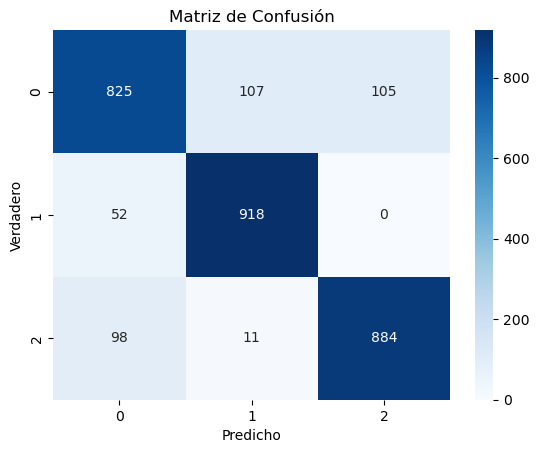

In [10]:
# Crear la matriz de confusión
cm = confusion_matrix(Y_test, y_pred)

# Visualizarla con seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicho")
plt.ylabel("Verdadero")
plt.title("Matriz de Confusión")
plt.show()

In [11]:
print(classification_report(Y_test, y_pred))

                     precision    recall  f1-score   support

lung_adenocarcinoma       0.85      0.80      0.82      1037
       lung_benigno       0.89      0.95      0.92       970
     lung_carcinoma       0.89      0.89      0.89       993

           accuracy                           0.88      3000
          macro avg       0.88      0.88      0.88      3000
       weighted avg       0.87      0.88      0.87      3000



# GridSearch Regresión Logística

In [ ]:
log_reg = LogisticRegression(max_iter=3000)

param_grid = {"C": [0.01, 0.1, 1, 10, 100], "penalty": ["l2", "none"], "solver":["liblinear", "lbfgs", "saga"]}

grid_search_lrm = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring="accuracy")

grid_search_lrm.fit(X_train, Y_train)

/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
75 fits failed out of a total of 150.
The score on these train-test partitio

NameError: name 'grid_search' is not defined

In [8]:
# Mejor modelo y sus parámetros
print("Mejores parámetros encontrados: ", grid_search_lrm.best_params_)
print("Mejor precisión obtenida: ", grid_search_lrm.best_score_)

Mejores parámetros encontrados:  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Mejor precisión obtenida:  0.6869166666666666


In [5]:
mejor_lr = LogisticRegression(max_iter=3000, C=0.01, penalty="l2", solver="lbfgs")
mejor_lr.fit(X_train, Y_train)

y_pred = mejor_lr.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f'Precisión con el mejor C, penalty y solver: {accuracy:.2f}')

Precisión con el mejor C, penalty y solver: 0.68


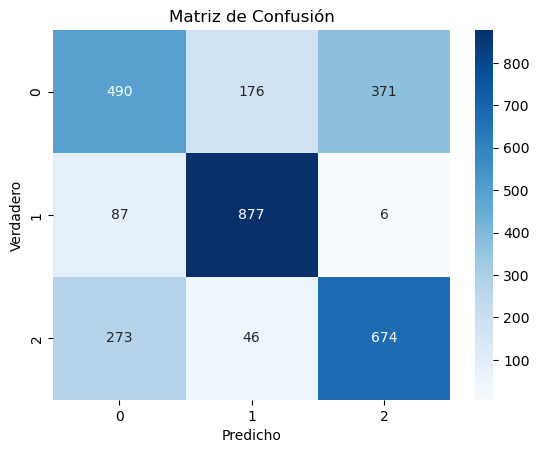

In [10]:
# Crear la matriz de confusión
cm = confusion_matrix(Y_test, y_pred)

# Visualizarla con seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicho")
plt.ylabel("Verdadero")
plt.title("Matriz de Confusión")
plt.show()

In [11]:
print(classification_report(Y_test, y_pred))

                     precision    recall  f1-score   support

lung_adenocarcinoma       0.58      0.47      0.52      1037
        lung_begino       0.80      0.90      0.85       970
     lung_carcinoma       0.64      0.68      0.66       993

           accuracy                           0.68      3000
          macro avg       0.67      0.69      0.68      3000
       weighted avg       0.67      0.68      0.67      3000



# GridSearch Random Forest

In [ ]:
modelo_rf = RandomForestClassifier(random_state=42)

param_grid = {"n_estimators": [50, 100, 200],
              "max_depth": [10, 20, 30, None],
              "min_samples_split": [2, 5, 10],
              "min_samples_leaf": [1, 2, 4],
              "max_features": ["sqrt", "log2", None],
              "criterion": ["gini", "entropy", "log_loss"]}

# Usar GridSearchCV para encontrar el mejor valor de C
grid_search_rf = GridSearchCV(modelo_rf, param_grid, cv=5, scoring="accuracy", n_jobs=1, verbose=2)  # 5-fold cross-validation
grid_search_rf.fit(X_train, Y_train)

# Ver el mejor valor de C
print(f'Best n_estimators: {grid_search_rf.best_params_["n_estimators"]}')
print(f'Best max_depth: {grid_search_rf.best_params_["max_depth"]}')
print(f'Best min_samples_leaf: {grid_search_rf.best_params_["min_samples_leaf"]}')
print(f'Best min_samples_split: {grid_search_rf.best_params_["min_samples_split"]}')
print(f'Best max_features: {grid_search_rf.best_params_["max_features"]}')
print(f'Best criterion: {grid_search_rf.best_params_["criterion"]}')

# Evaluar el modelo con el mejor C
best_rf_model = grid_search_rf.best_estimator_
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f'Precisión con los mejores parametros: {accuracy:.2f}')

KeyboardInterrupt: 

In [17]:
y_pred = modelo_rf.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f'Precisión con el mejor C, penalty y solver: {accuracy:.2f}')

Precisión con el mejor C, penalty y solver: 0.84


# GridSearch XGBClassifier

In [24]:
modelo_XGB = XGBClassifier(device="cuda", random_state=42)

param_grid = {
    'n_estimators': [100, 200],  # Número de árboles
    'learning_rate': [0.01, 0.1],  # Tasa de aprendizaje
    'max_depth': [3, 6, 10],  # Profundidad del árbol
    'subsample': [0.7, 1],  # Proporción de muestras usadas en cada árbol
    'colsample_bytree': [0.7, 1],  # Proporción de características usadas en cada árbol
    'gamma': [0, 0.1],  # Poda del árbol (reducción de sobreajuste)
    'reg_alpha': [0, 0.1, 1],  # Regularización L1
    'reg_lambda': [1, 10, 100],  # Regularización L2
    "device": ["cuda"]  # ⚡ Habilitar GPU
}

# Usar GridSearchCV para encontrar el mejor valor de C
grid_search_XGB = GridSearchCV(modelo_XGB, param_grid, cv=5, scoring="accuracy", n_jobs=1, verbose=2)  # 5-fold cross-validation
grid_search_XGB.fit(X_train, Y_train)

# Evaluar el modelo con los mejores parametros
best_XGB_model = grid_search_XGB.best_estimator_
y_pred = best_XGB_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f'Precisión con los mejores parametros: {accuracy:.2f}')

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
[CV] END colsample_bytree=0.7, device=cuda, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   8.7s
[CV] END colsample_bytree=0.7, device=cuda, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   8.1s
[CV] END colsample_bytree=0.7, device=cuda, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   7.8s
[CV] END colsample_bytree=0.7, device=cuda, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   7.9s
[CV] END colsample_bytree=0.7, device=cuda, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   8.0s
[CV] END colsample_bytree=0.7, device=cuda, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, reg_alp

In [ ]:
# Tardo 6483 minutos el grid search

mejor_XGB = XGBClassifier(n_estimators = 200,
                          learning_rate = 0.1,
                          max_depth = 10,
                          subsample = 0.7,
                          colsample_bytree = 0.7,
                          gamma = 0.1,
                          reg_alpha = 0.1,
                          reg_lambda = 10,
                          device = "cuda")

mejor_XGB.fit(X_train, Y_train)

y_pred = mejor_XGB.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f'Precisión con los mejores parámetros: {accuracy:.2f}')

c:\Users\Dragut\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\core.py:158: UserWarning: [11:33:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Precisión con los mejores parámetros: 0.90


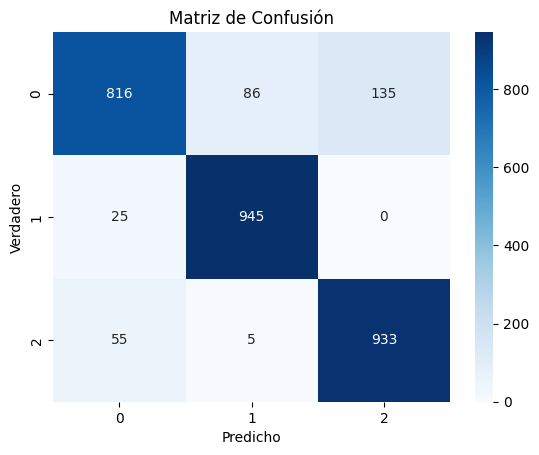

In [20]:
# Crear la matriz de confusión
cm = confusion_matrix(Y_test, y_pred)

# Visualizarla con seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicho")
plt.ylabel("Verdadero")
plt.title("Matriz de Confusión")
plt.show()

In [21]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.79      0.84      1037
           1       0.91      0.97      0.94       970
           2       0.87      0.94      0.91       993

    accuracy                           0.90      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.90      0.90      0.90      3000



In [42]:
img = cv2.imread('C:\\Users\\Dragut\\Desktop\\bobio\\Samsung\\PF\\Imagenes prueba\\car2.jpg')
img = cv2.resize(img, (64, 64)) # Redimensionamos la imagen
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convertimos a escala de grises
img = img.astype("float32") / 255.0 # "Normalizamos" el arreglo dividiendo entre 255
img = img.flatten()

In [43]:
mejor_XGB.predict([img])

array([0], dtype=int64)